# 4.1

In [2]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

data = np.array([[-1., -.1], [.3, .5], [2., .5]])
print data  # [X|Yt]

X = data[:,0]
Yt = data[:,1]

[[-1.  -0.1]
 [ 0.3  0.5]
 [ 2.   0.5]]


In [121]:
def plot_init(X,Yt):
    x_min, x_max = np.min(X)-.5, np.max(X)+.5
    y_min, y_max = np.min(Yt)-.5, np.max(Yt)+.5
    
    pp.figure(figsize=(16,8))

    pp.subplot(1,2,1)
    pp.scatter(X,Yt)
    
    pp.xlim(x_min, x_max)
    pp.ylim(y_min, y_max)
    pp.ylabel("y")
    pp.xlabel("x")
    
    pp.subplot(1,2,2)
    pp.xlim(0,.5)
    pp.ylim(0,.5)
    pp.grid()
    return

def plot_line_and_weights(X, w, color="grey"):
    x_min, x_max = np.min(X)-.5, np.max(X)+.5

    Xline = np.linspace(x_min, x_max, 100)
    Xline = np.vstack([np.ones(Xline.shape), Xline])

    pp.subplot(1,2,1)
    pp.plot(Xline[1,:], (w).dot(Xline), color=color)

    pp.subplot(1,2,2)
    pp.scatter(w[0], w[1], c=color, marker='x')
    return

## (a) Steepest Gradient Descent

  i         w0         w1       E(w)
  0  -0.279063  -0.350632   0.061439
  1   0.086439   0.215618   0.045573
  2   0.146502   0.222307   0.040953
  3   0.175085   0.210308   0.039271
  4   0.191976   0.202295   0.038658
  5   0.202157   0.197420   0.038435
  6   0.208304   0.194475   0.038353
  7   0.212016   0.192696   0.038323
  8   0.214257   0.191622   0.038313
  9   0.215610   0.190974   0.038309
 10   0.216428   0.190582   0.038307


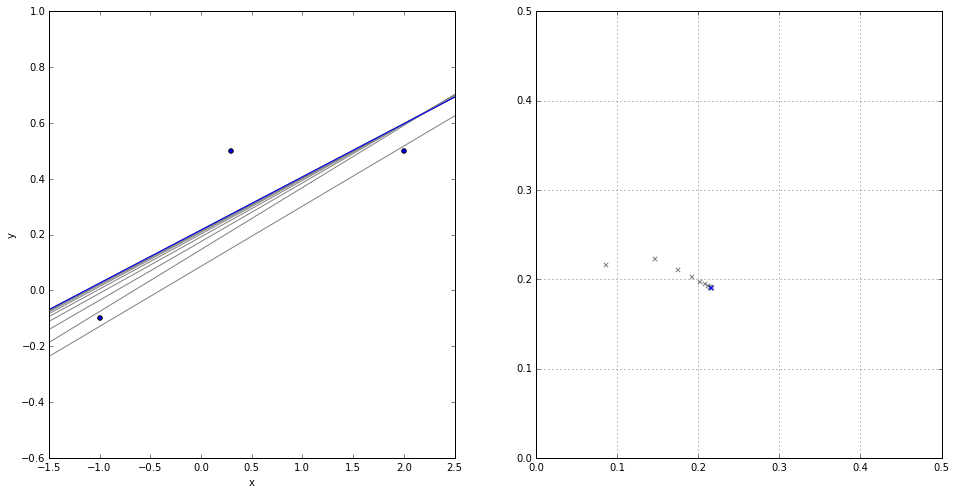

In [206]:
def gradient_descent(X, Yt, eta, w_start=np.random.random(2)*2. - 1, draw=False):
    if draw:
        plot_init(X, Yt)
        
    w = w_start  # [w_bias, w1]
    X = np.vstack([np.ones(X.shape), X])  # stack bias on
    # print w, "w"
    # print X, "X"
    Y = wTx = w.dot(X)
    Ew = ((Y - Yt)**2).sum(0)/2.
    
    print "%3s %10s %10s %10s"%("i", "w0", "w1", "E(w)")

    for i in range(1000):        
        # calc gradient
        H = X.dot(X.T)
        # print H, "H"
        b = -X.dot(Yt.T)
        # print b, "b"
        g = H.dot(w) + b
        # print g, "g"
        
        w_new = w - eta*g
        
        # calc output
        Y = wTx = w_new.dot(X)

        # calc sum of squares error
        # Ew = (( Y-Yt ).dot( (Y-Yt).T ))/2.
        Ew_new = ((Y-Yt)**2).sum(0)/2.
        # print Ew, "Ew"
        
        print "%3i %10f %10f %10f"%(i, w[0], w[1], Ew_new)

        if draw:
            plot_line_and_weights(X, w_new)
        
        if np.abs(Ew - Ew_new)/Ew < 10**-4:
            break;
        else:
            w = w_new
            Ew = Ew_new

    if draw:
        plot_line_and_weights(X, w, color="blue")
    
    return

gradient_descent(X, Yt, .5/float(len(X)), draw=True)

## (b) Line Search

  i         w0         w1       E(w)
  0  -0.754419   0.358432   0.230268
  1   0.032113   0.476917   0.067167
  2   0.071521   0.215311   0.042646
  3   0.189775   0.233125   0.038959
  4   0.195700   0.193793   0.038404
  5   0.213479   0.196471   0.038321
  6   0.214369   0.190558   0.038309
  7   0.217042   0.190960   0.038307


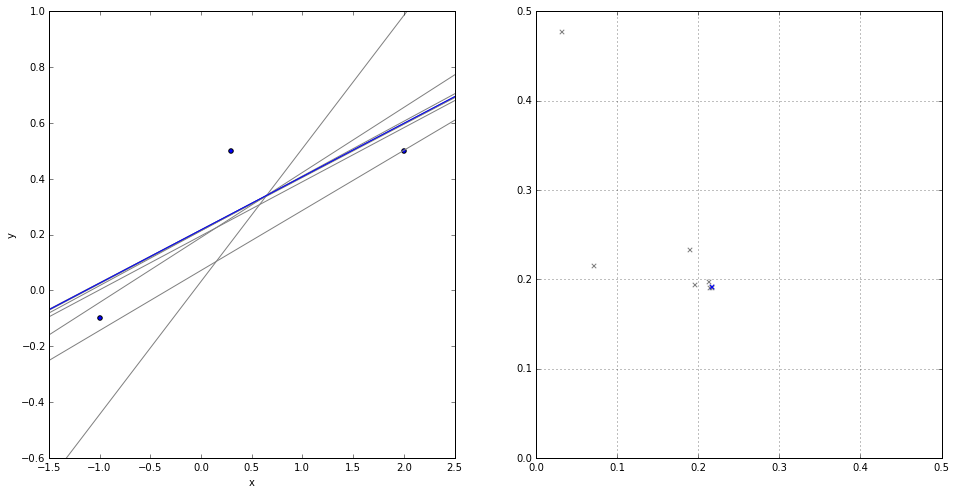

In [205]:
def line_search(X, Yt, w_start=np.random.random(2)*2. - 1, draw=False):
    if draw:
        plot_init(X, Yt)
        
    w = w_start  # [w_bias, w1]
    X = np.vstack([np.ones(X.shape), X])  # stack bias on
    # print w, "w"
    # print X, "X"
    Y = wTx = w.dot(X)
    Ew = ((Y - Yt)**2).sum(0)/2.
    
    print "%3s %10s %10s %10s"%("i", "w0", "w1", "E(w)")

    for i in range(1000):        
        # calc gradient
        H = X.dot(X.T)
        # print H, "H"
        b = -X.dot(Yt.T)
        # print b, "b"
        g = H.dot(w) + b
        # print g, "g"
        
        alpha = -( g.T.dot(g) )/( g.T.dot(H).dot(g) )
        w_new = w + alpha*g
        
        # calc output
        Y = wTx = w_new.dot(X)

        # calc sum of squares error
        # Ew = (( Y-Yt ).dot( (Y-Yt).T ))/2.
        Ew_new = ((Y-Yt)**2).sum(0)/2.
        # print Ew, "Ew"
        
        print "%3i %10f %10f %10f"%(i, w[0], w[1], Ew_new)

        if draw:
            plot_line_and_weights(X, w_new)
        
        if np.abs(Ew - Ew_new)/Ew < 10**-4:
            break;
        else:
            w = w_new
            Ew = Ew_new

    if draw:
        plot_line_and_weights(X, w, color="blue")
    
    return

line_search(X, Yt, draw=True)

## (c) Conjugate Gradient

  i         w0         w1       E(w) Y
  0   1.286356  -2.947621  22.446825 [ 5.34744524  0.50780764 -5.82094922]
  1   1.624647  -3.722798  34.814560 [-0.63582934 -0.46576891 -0.24338219]
  2  -0.505014   0.130816   0.886220 [-0.79765405 -0.19650571  0.58961136]
  3  -0.335232   0.462422   0.489936 [-0.33492924 -0.12464544  0.15034107]
  4  -0.173172   0.161757   0.283818 [-0.45735854 -0.04025441  0.50518946]
  5  -0.136509   0.320849   0.209803 [-0.19250073  0.01186277  0.27910735]
  6  -0.035298   0.157203   0.147814 [-0.28991447  0.04716918  0.48797086]
  7  -0.030619   0.259295   0.120634 [-0.10422394  0.09398238  0.35317525]
  8   0.048242   0.152466   0.093213 [-0.18472385  0.10875821  0.49254245]
  9   0.041032   0.225755   0.080152 [-0.04386016  0.15287216  0.4101375 ]
 10   0.107472   0.151333   0.065862 [-0.11086676  0.15720983  0.50777152]
 11   0.095346   0.206213   0.058842 [-0.0021919   0.19852019  0.46098985]
 12   0.152202   0.154394   0.050989 [-0.05657602  0.19740838

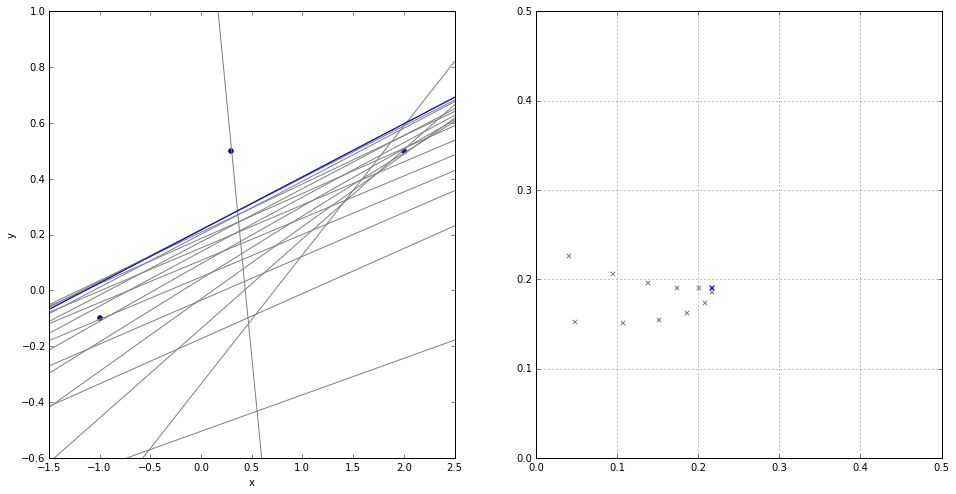

In [203]:
def conjugate_gradient(X, Yt, w_start=np.random.random(2)*2. - 1, draw=False):
    if draw:
        plot_init(X, Yt)
    
    w = w_start  # [w_bias, w1]
    X = np.vstack([np.ones(X.shape), X])  # stack bias on
    # print w, "w"
    # print X, "X"
    
    print "%3s %10s %10s %10s %s"%("i", "w0", "w1", "E(w)", "Y")

    # calc gradient for step 1
    H = X.dot(X.T)
    # print H, "H"
    b = -X.dot(Yt.T)
    # print b, "b"
    g = H.dot(w) + b
    # print g, "g"
    
    w = -g  # weights
    d = -g  # direction
    
    Y = w.T.dot(X)
    # calc sum of squares error
    # Ew = (( Y-Yt ).dot( (Y-Yt).T ))/2.
    Ew = ((Y-Yt)**2).sum(0)/2.
    # print Ew, "Ew"
    
    for i in range(1000):
        # minimize E along d
        alpha = -( d.T.dot(g) )/( d.T.dot(H).dot(d) )
        w_new = w + alpha*d
        
        Y = w_new.T.dot(X)
        # calc sum of squares error
        # Ew = (( Y-Yt ).dot( (Y-Yt).T ))/2.
        Ew_new = ((Y - Yt)**2).sum(0)/2.
        # print Ew, "Ew"

        print "%3i %10f %10f %10f %s"%(i, w[0], w[1], Ew, str(Y))
        
        if draw:
            plot_line_and_weights(X, w_new)
        
        if np.abs(Ew - Ew_new)/Ew < 10**-4:
            break;
        else:
            g_new = H.dot(w_new) + b
            beta = -( g_new.T.dot(g_new) )/( g.T.dot(g) )
            d_new = g_new + beta*d
            g = g_new
            d = d_new
            w = w_new
            Ew = Ew_new
        
    if draw:
        plot_line_and_weights(X, w, "blue")
    
    return

conjugate_gradient(X, Yt, draw=True)

gradient descent
  i         w0         w1       E(w)
  0   0.564954   0.188431   0.081137
  1   0.391650   0.114505   0.053870
  2   0.321016   0.140842   0.043981
  3   0.279992   0.160141   0.040375
  4   0.255299   0.171956   0.039061
  5   0.240392   0.179099   0.038581
  6   0.231391   0.183412   0.038407
  7   0.225956   0.186016   0.038343
  8   0.222675   0.187589   0.038320
  9   0.220693   0.188538   0.038311
 10   0.219497   0.189111   0.038308
line search
  i         w0         w1       E(w)
  0   0.564954   0.188431   0.068523
  1   0.320869   0.084312   0.043373
  2   0.275904   0.189725   0.039156
  3   0.234977   0.172266   0.038449
  4   0.227437   0.189942   0.038330
  5   0.220574   0.187014   0.038310
  6   0.219310   0.189978   0.038307
conjugate gradient
  i         w0         w1       E(w) Y
  0  -1.039823  -0.443554   4.467415 [-0.73623556 -1.44820947 -2.37925228]
  1  -1.283908  -0.547672   6.245205 [ 0.32876495  0.36912113  0.42189459]
  2   0.359808   0.0310

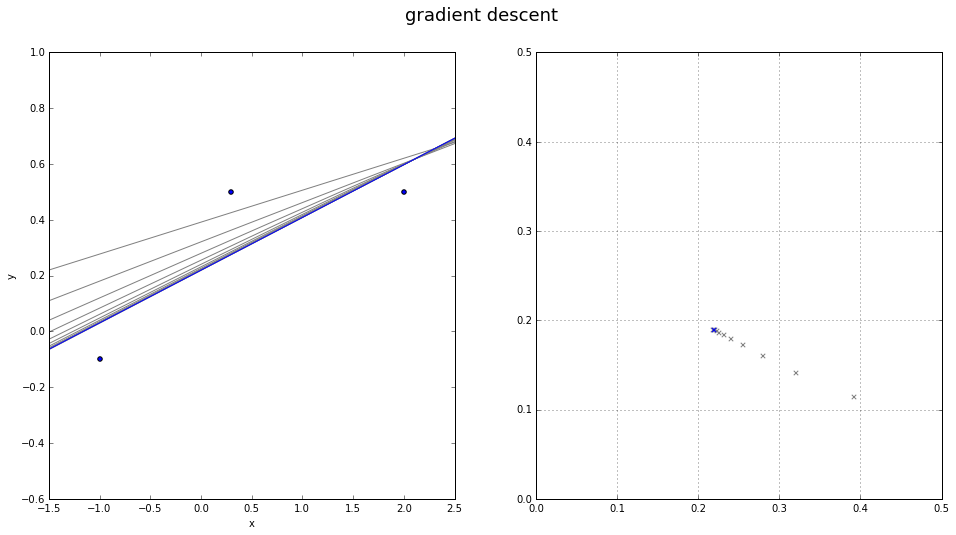

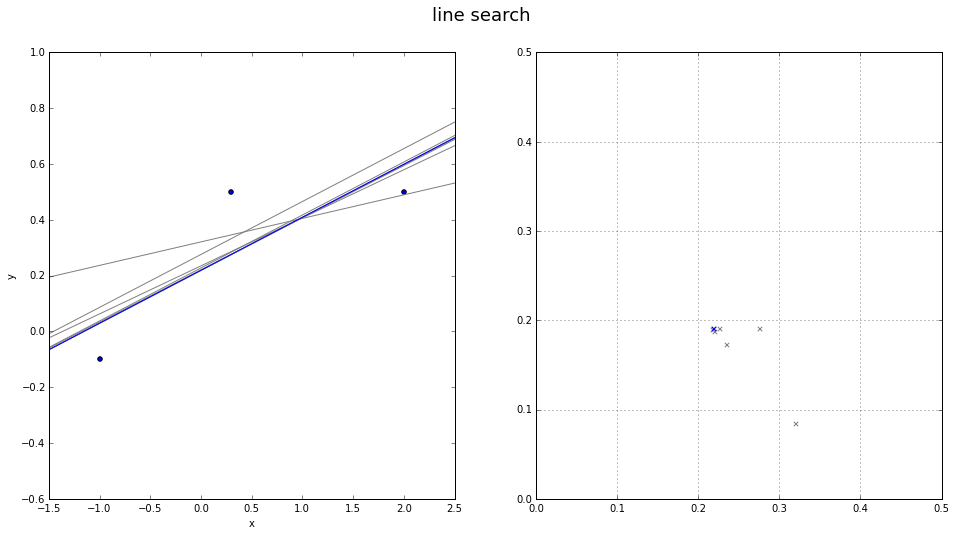

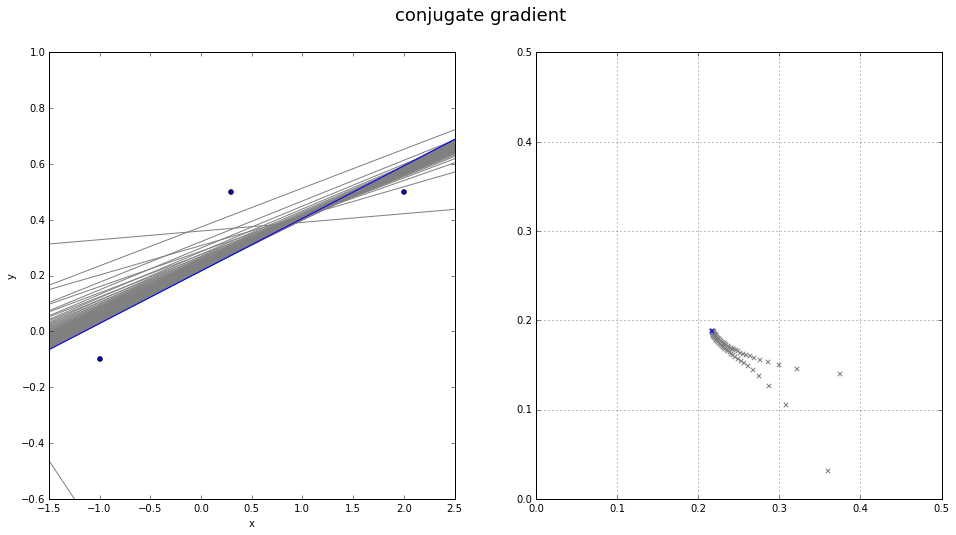

In [217]:
w_start = np.random.rand(2)*2. - 1

print "gradient descent"
gradient_descent(X, Yt, 0.5/float(len(X)), w_start, draw=True)
pp.suptitle("gradient descent", fontsize=18)

print "line search"
line_search(X, Yt, w_start, draw=True)
pp.suptitle("line search", fontsize=18)

print "conjugate gradient"
conjugate_gradient(X, Yt, w_start, draw=True)
pp.suptitle("conjugate gradient", fontsize=18)